In [161]:
# a. set magic 
%load_ext autoreload
%autoreload 2

# b. load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# c. local modules
from data import child_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read data

In [210]:
# Read data 
with open('carro-mira_new.txt', 'r') as file:
    # Read the content of the file
    content = file.read()

    # Remove spaces and replace with commas
    content_without_spaces = ','.join(content.split())

    # Create DataFrame with separated columns
    num_columns = 25  # Specify the desired number of columns
    data = np.array(content_without_spaces.split(','))
    reshaped_data = np.reshape(data, (-1, num_columns))
    df = pd.DataFrame(reshaped_data)

In [211]:
edu_h = df.iloc[:, 0]          # education of husband
edu_w = df.iloc[:, 1]          # education of wife
age_w_m = df.iloc[:, 2]        # age of wife at the moment of marriage
idx = df.iloc[:, 3]            # couple id
t = df.iloc[:, 4]              # year
age_w = df.iloc[:, 5]          # age of wife
age_h = df.iloc[:, 6]          # age of husband
c_birth_i = df.iloc[:, 7]      # current birth indicator
n_birth_i = df.iloc[:, 8]      # next period birth indicator
x = df.iloc[:, 9]              # number of children
cc = df.iloc[:, 10]            # current contraception choice (1, 2, 3)
p_birth_i = df.iloc[:, 11]     # previous birth indicator
r = df.iloc[:, 12]             # religious couple indicator 
no_c = df.iloc[:, 13]          # no contraception (dummy)
c = df.iloc[:, 14]             # contraception (dummy)
s_c = df.iloc[:, 15]           # sterilization (dummy)
p_c = df.iloc[:, 24]           # previous contraception choice

In [259]:
data = {
        'year': t,
        'edu_h': edu_h,
        'edu_w': edu_w,
        'age_w_m': age_w_m,
        'idx': idx,
        'age_w': age_w,
        'age_h': age_h,
        'c_birth_i': c_birth_i,
        'n_birth_i': n_birth_i,
        'x': x,
        'cc': cc,
        'p_birth_i': p_birth_i,
        'r': r,
        'no_c': no_c,
        'c': c,
        's_c': s_c,
        'p_c': p_c
        }

df_1 = pd.DataFrame(data) 
df_1 = df_1.astype(int)
df_1 = df_1[df_1['cc'] != 3]
# dropper åar, som kun optræder 1 gang 
df_1 = df_1.groupby('idx').filter(lambda x: len(x) > 1).reset_index(drop=True)

# Education destribution for wife and housband

In [213]:
# Create a cross-tabulation (joint distribution) of edu_h and edu_w
joint_distribution = pd.crosstab(df_1['edu_w'], df_1['edu_h'], normalize=True)*100

# Add row and column sums to joint_distribution
joint_distribution['Sum'] = joint_distribution.sum(axis=1)
joint_distribution.loc['Sum'] = joint_distribution.sum()

# Display the joint distribution with row and column sums
print("Joint Distribution (edu_h x edu_w):")
print(joint_distribution.round(2))

Joint Distribution (edu_h x edu_w):
edu_h     0     1      2      3     4     5     6     Sum
edu_w                                                    
0      1.35  0.31   3.41   0.23  0.00  0.12  0.00    5.41
1      0.81  1.59  15.23   2.20  0.20  0.22  0.04   20.29
2      1.24  5.09  31.07   9.53  1.37  2.37  0.15   50.82
3      0.09  0.95   4.49   3.92  0.85  2.28  0.00   12.58
4      0.04  0.18   1.24   1.18  1.36  2.04  0.07    6.10
5      0.00  0.08   0.58   0.79  0.53  2.12  0.29    4.40
6      0.00  0.00   0.00   0.10  0.05  0.17  0.08    0.40
Sum    3.52  8.21  56.02  17.96  4.35  9.32  0.63  100.00


## Table 3: Age, parity, birth rate and contraceptive use; time series of sample means

In [214]:
# Grouping the data by time (assuming you have a 'year' column)
grouped_data = df_1.groupby(['year'])

# Calculating the mean for age, parity, birth rate, and contraceptive use
mean_age = grouped_data['age_w'].mean()
mean_parity = grouped_data['x'].mean()
mean_birth_rate = grouped_data['c_birth_i'].mean()
mean_contraceptive_use = grouped_data['c'].mean()

# Calculating the standard deviation for age, parity, birth rate, and contraceptive use
std_age = grouped_data['age_w'].std()
std_parity = grouped_data['x'].std()
std_birth_rate = grouped_data['c_birth_i'].std()
std_contraceptive_use = grouped_data['c'].std()

# Calculating the count of observations for each year
count_observations = grouped_data['year'].count()

# Creating a DataFrame to store the time series of sample means and standard deviations
time_series_means = pd.DataFrame({
    'Obs'       : count_observations,
    'Mean Age': mean_age.round(2),
    'Mean Parity': mean_parity.round(2),
    'Birth Rate': mean_birth_rate.round(3),
    'Contracept': (mean_contraceptive_use * 100).round(2)
})

# Adding standard deviation as parentheses to column values
time_series_means['Mean Age'] = time_series_means['Mean Age'].round(2).astype(str) + ' (' + std_age.round(2).astype(str) + ')'
time_series_means['Mean Parity'] = time_series_means['Mean Parity'].round(2).astype(str) + ' (' + std_parity.round(2).astype(str) + ')'
time_series_means['Contracept'] = time_series_means['Contracept'].round(2).astype(str) + '%'

# Displaying the time series of sample means with standard deviation in parentheses
print(time_series_means)

       Obs      Mean Age  Mean Parity  Birth Rate Contracept
year                                                        
83     325  24.85 (4.62)  1.19 (1.16)       0.662     53.54%
84    1618  28.58 (5.11)  1.49 (1.05)       0.124     67.86%
85    1788  28.96 (5.34)  1.52 (1.08)       0.130      69.3%
86    1891  29.48 (5.46)  1.54 (1.07)       0.123     72.13%
87    1997    30.0 (5.6)  1.55 (1.05)       0.105     72.26%
88    2102  30.44 (5.82)  1.53 (1.05)       0.098     72.74%
89    2209   30.9 (6.02)  1.53 (1.05)       0.102     73.11%
90    2314  31.32 (6.21)  1.52 (1.03)       0.095     74.29%
91    2329  31.66 (6.13)  1.51 (1.01)       0.082     74.97%
92    2343  31.92 (5.99)  1.49 (0.99)       0.086     74.48%
93    2338   32.3 (5.97)   1.5 (0.97)       0.098     76.26%


# Table 4: Sample birth frequencies by wife’s age (%)

Den viser ikke det samme som deres (hjælp fra caro) 

Vi ser på c_birth_i givet at de ikke contracepter, hvoraf om de fik et barn i sidste periode eller ej, og så om de contracepter

In [336]:
# Define the age group bins and labels
age_bins = [0, 25, 30, 35, 40, 45]
age_labels = ['15-24', '25-29', '30-34', '35-39','40-44']

df_2 = df_1.copy()
df_2 = df_2[df_2['c_birth_i'] == 1].reset_index(drop=True)

# Create a new column 'age_group' in df_1 based on age bins
df_2['age_group'] = pd.cut(df_2['age_w'], bins=age_bins, labels=age_labels, right=False)

df_2_p = df_2.groupby(['age_group', 'cc', 'p_birth_i']).count()[['idx']]
# print(df_2_p)
df_2_p_all = df_2.groupby(['age_group']).count()[['idx']]
# print(df_2_p_all)
df_p = df_2_p/df_2_p_all * 100
df_p = df_p.reset_index()
print(df_p)

# # No contraception
# df_2_no = df_2[df_2['cc'] == 1].reset_index(drop=True)
# df_2_no_p0 = df_2_no[df_2_no['p_birth_i'] == 0].reset_index(drop=True)
# df_2_no_p1 = df_2_no[df_2_no['p_birth_i'] == 1].reset_index(drop=True)

# df_2_no_b_p = df_2_no.groupby(['age_group', 'p_birth_i', 'cc']).count()[['idx']]
# # print(df_2_no_b_p)

# # No contraception and no birth (0) and birth (1) in previous period
# df_2_no_b_p = df_2_no.groupby(['age_group', 'p_birth_i']).count()[['idx']]
# # print(df_2_no_b_p)

# # Contraception
# df_2_c = df_2[df_2['cc'] == 2].reset_index(drop=True)
# # Contraception and birth 
# df_2_c_b_p = df_2_c.groupby(['age_group']).count()[['idx']]
# # print(df_2_c_b_p)


   age_group  cc  p_birth_i   idx
0      15-24   1          0 40.76
1      15-24   1          1  2.21
2      15-24   2          0 54.34
3      15-24   2          1  2.69
4      25-29   1          0 37.51
5      25-29   1          1  1.89
6      25-29   2          0 59.49
7      25-29   2          1  1.11
8      30-34   1          0 36.52
9      30-34   1          1  1.15
10     30-34   2          0 61.38
11     30-34   2          1  0.96
12     35-39   1          0 33.82
13     35-39   1          1  0.74
14     35-39   2          0 63.97
15     35-39   2          1  1.47
16     40-44   1          0 44.44
17     40-44   1          1  0.00
18     40-44   2          0 55.56
19     40-44   2          1  0.00


## Figure 1: Proportion of couples contracepting, by age and parity

Denne er ikke som deres (hjælp fra caro) 

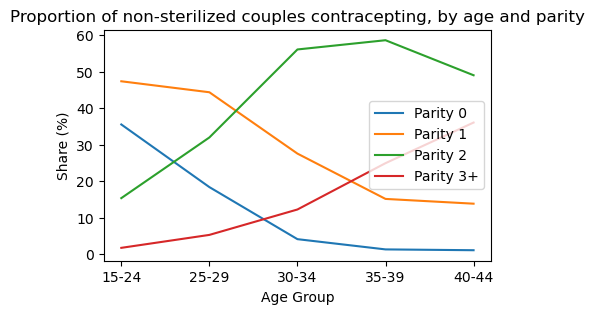

In [340]:
# Define the age group bins and labels
age_bins = [0, 25, 30, 35, 40, 45]
age_labels = ['15-24', '25-29', '30-34', '35-39','40-44']

# copy the data
df_3 = df_1.copy()

# Create a new column 'age_group' in df_1 based on age bins
df_3['age_group'] = pd.cut(df_3['age_w'], bins=age_bins, labels=age_labels, right=False)

# Define the parity groups
parity_groups = ['0', '1', '2', '3+']

# Filter the data for non-sterilized couples
df_3 = df_3[df_3['cc'] == 2].reset_index(drop=True)

# Sum the groups where parity is greater than 3 and represent it as "3+"
df_3.loc[df_3['x'] >= 3, 'x'] = '3+'

grouped_data = df_3.groupby(['age_group', 'x']).count()[['idx']]
# print(grouped_data)
age_grouped = df_3.groupby(['age_group']).count()[['idx']]
# print(age_grouped)

grouped_data_share = grouped_data/age_grouped * 100

# Reset the index of the DataFrame
grouped_data_share = grouped_data_share.reset_index()

# Rename the column to 'Share'
grouped_data_share = grouped_data_share.rename(columns={'idx': 'Share'})

grouped_data_share_0 = grouped_data_share[grouped_data_share['x'] == 0]
grouped_data_share_1 = grouped_data_share[grouped_data_share['x'] == 1]
grouped_data_share_2 = grouped_data_share[grouped_data_share['x'] == 2]
grouped_data_share_3 = grouped_data_share[grouped_data_share['x'] == '3+']

plt.figure(figsize=(5, 3))
plt.plot(grouped_data_share_0['age_group'], grouped_data_share_0['Share'], label=f'Parity 0')
plt.plot(grouped_data_share_1['age_group'], grouped_data_share_1['Share'], label=f'Parity 1')    
plt.plot(grouped_data_share_2['age_group'], grouped_data_share_2['Share'], label=f'Parity 2')
plt.plot(grouped_data_share_3['age_group'], grouped_data_share_3['Share'], label=f'Parity 3+')

plt.xlabel('Age Group')
plt.ylabel('Share (%)')
plt.title('Proportion of non-sterilized couples contracepting, by age and parity')
plt.legend()
plt.show()

# # Save the figure as an image file
# plt.savefig('figure.png', dpi=300)  # Change the file extension to save as a different image format

# # Alternatively, save the figure as a PDF file
# plt.savefig('figure.pdf', bbox_inches='tight')

# # Close the figure to free up memory
# plt.close()

# \begin{figure}
#     \centering
#     \includegraphics[width=0.8\textwidth]{figure.png}  % Replace 'figure.png' with the actual filename
#     \caption{Proportion of non-sterilized couples contracepting, by age and parity}
#     \label{fig:proportion}
# \end{figure}

## Table 5: Contraceptive actions by age and parity (%)

In [333]:
# Define the age group bins and labels
age_bins = [0, 25, 30, 35, 40, 45]
age_labels = ['15-24', '25-29', '30-34', '35-39', '40-44']

df_5 = df_1.copy()

# Create a new column 'age_group' in df_1 based on age bins
df_5['age_group'] = pd.cut(df_5['age_w'], bins=age_bins, labels=age_labels, right=False)

# Define the parity groups
parity_groups = ['0', '1', '2', '3+']

df_5.loc[df_1['x'] >= 3, 'x'] = '3+'

# Contraceptive actions by age and parity (%)

df_1_ca_sum = df_5.groupby(['x', 'age_group']).count()['idx']
df_1_ca_sum = df_1_ca_sum.reset_index()

df_1_no_c = df_5[df_5['cc'] == 1]
df_1_ca_no_c = df_1_no_c.groupby(['x', 'age_group']).count()['idx']
df_1_ca_no_c = df_1_ca_no_c.reset_index()
df_1_ca_no_c.columns = ['x', 'age_group', 'No Contraception']

df_1_c = df_5[df_5['cc'] == 2]
df_1_ca_c = df_1_c.groupby(['x', 'age_group']).count()['idx']
df_1_ca_c = df_1_ca_c.reset_index()
df_1_ca_c.columns = ['x', 'age_group', 'Contraception']

data_ca = pd.merge(pd.merge(df_1_ca_no_c, df_1_ca_c, on=['x', 'age_group'], how='right'), df_1_ca_sum, on=['x', 'age_group'], how='right')

data_ca['No Contraception (%)'] = ((data_ca['No Contraception'] / data_ca['idx']) * 100).round(2)
data_ca['Contraception (%)'] = ((data_ca['Contraception'] / data_ca['idx']) * 100).round(2)

data_ca_final = data_ca[['x', 'age_group', 'No Contraception (%)', 'Contraception (%)']]
data_ca_final.columns = ['Parity', 'Age Group', 'No Contraception (%)', 'Contraception (%)']

formatted_table = data_ca_final.copy()
formatted_table[['No Contraception (%)', 'Contraception (%)']] = formatted_table[['No Contraception (%)', 'Contraception (%)']].applymap('{:.2f}'.format)

# Convert formatted table to LaTeX table format with lines between x groups
latex_table = formatted_table.style.hide(axis='index').to_latex(caption='Contraceptive Actions by Age and Parity (%)', label='tab:contraceptive-actions')

print(latex_table)

\begin{table}
\caption{Contraceptive Actions by Age and Parity (%)}
\label{tab:contraceptive-actions}
\begin{tabular}{llll}
Parity & Age Group & No Contraception (%) & Contraception (%) \\
0 & 15-24 & 44.99 & 55.01 \\
0 & 25-29 & 47.89 & 52.11 \\
0 & 30-34 & 56.19 & 43.81 \\
0 & 35-39 & 72.54 & 27.46 \\
0 & 40-44 & 75.00 & 25.00 \\
1 & 15-24 & 29.41 & 70.59 \\
1 & 25-29 & 28.32 & 71.68 \\
1 & 30-34 & 30.12 & 69.88 \\
1 & 35-39 & 27.27 & 72.73 \\
1 & 40-44 & 25.56 & 74.44 \\
2 & 15-24 & 21.78 & 78.22 \\
2 & 25-29 & 15.96 & 84.04 \\
2 & 30-34 & 13.69 & 86.31 \\
2 & 35-39 & 12.37 & 87.63 \\
2 & 40-44 & 15.50 & 84.50 \\
3+ & 15-24 & 28.85 & 71.15 \\
3+ & 25-29 & 26.13 & 73.87 \\
3+ & 30-34 & 17.70 & 82.30 \\
3+ & 35-39 & 17.92 & 82.08 \\
3+ & 40-44 & 20.46 & 79.54 \\
\end{tabular}
\end{table}



## Table 7: Contraceptive choices, transition probabilities

In [355]:
# Note: These sample statistics are calculated for couples whose education level is less than high school (both husband and wife); 
# the couple has R = 0 (not religious) and married when the wife was between 20 and 24 years old. 
# Periods t with a birth (b_t = 1) are excluded.

df_6 = df_1.copy()

df_6.loc[df_6['x'] >= 3, 'x'] = '3+'

def contraceptive_transition(df, parity):
    # Find the lagged values of x and cc
    df['x_shifted'] = df.groupby('idx')['x'].shift(-1)
    df['cc_shifted'] = df.groupby('idx')['cc'].shift(-1)

    # Filter for given parity at t and t + 1
    df_pivot = df[(df['x'] == parity) & (df['x_shifted'] == parity)]

    # Group by contraception choice at t and t + 1
    grouped = df_pivot.groupby(['cc', 'cc_shifted']).size().reset_index(name='Count')

    # Calculate transition probabilities
    grouped['Transition Probability'] = grouped.groupby('cc')['Count'].apply(lambda x: x / x.sum())

    # Drop the Count column (optional)
    grouped = grouped.drop('Count', axis=1)

    # Create pivot table
    pivot_table = grouped.pivot(index='cc', columns='cc_shifted', values='Transition Probability')

    # Add row above column names
    pivot_table.columns = ['No Contraception', 'Contracept']
    pivot_table.columns = pd.MultiIndex.from_arrays([['Action at time t + 1', ''], pivot_table.columns])

    # Add column to the left of index names
    pivot_table.index = ['No Contraception', 'Contracept']
    pivot_table.index = pd.MultiIndex.from_tuples([('Action at time t', 'No Contraception'), (' ', 'Contracept')])

    # pivot_table = pivot_table.set_index(['Action at time t', pivot_table.index]).rename_axis(['',''])
    # pivot_table.insert(0, ('Action at time t', ''), '')

    pivot_table = (pivot_table * 100).round(2)

    # Format pivot table values to two decimal places
    formatted_table = pivot_table.applymap('{:.2f}'.format)

    # Convert pivot table to LaTeX table format
    latex_table = formatted_table.style.to_latex()
x
    return latex_table

In [347]:
# parity = 0
latex_table = contraceptive_transition(df_6, 0)
print(latex_table)

\begin{tabular}{llll}
 &  & Action at time t + 1 &  \\
 &  & No Contraception & Contracept \\
Action at time t & No Contraception & 85.11 & 14.89 \\
  & Contracept & 33.10 & 66.90 \\
\end{tabular}



In [348]:
# parity = 1
latex_table = contraceptive_transition(df_6, 1)
print(latex_table)

\begin{tabular}{llll}
 &  & Action at time t + 1 &  \\
 &  & No Contraception & Contracept \\
Action at time t & No Contraception & 71.57 & 28.43 \\
  & Contracept & 14.75 & 85.25 \\
\end{tabular}



In [349]:
# parity = 2
latex_table = contraceptive_transition(df_6, 2)
print(latex_table)

\begin{tabular}{llll}
 &  & Action at time t + 1 &  \\
 &  & No Contraception & Contracept \\
Action at time t & No Contraception & 73.16 & 26.84 \\
  & Contracept & 2.25 & 97.75 \\
\end{tabular}



In [357]:
# parity = 2
latex_table = contraceptive_transition(df_6, '3+')
print(latex_table)

\begin{tabular}{llll}
 &  & Action at time t + 1 &  \\
 &  & No Contraception & Contracept \\
Action at time t & No Contraception & 79.95 & 20.05 \\
  & Contracept & 2.72 & 97.28 \\
\end{tabular}



## Figure 3: Sample proportion of couples still contracepting, by duration of birth interval

In [362]:
df_7 = df_1.copy()

df_7.loc[df_7['x'] >= 3, 'x'] = '3+'

df_7_c = df_7[df_7['cc'] == 2].reset_index(drop=True)
df_7_c_grouped = df_7_c.groupby(['x']).size()
print(df_7_c_grouped)

df_7_grouped = df_7.groupby(['x']).size()
print(df_7_grouped)

share_c = (df_7_c_grouped / df_7_grouped*100).round(2)
print(share_c)

x
0     1806
1     4825
2     6666
3+    2078
dtype: int64
x
0     3550
1     6777
2     7793
3+    2588
dtype: int64
x
0    50.87
1    71.20
2    85.54
3+   80.29
dtype: float64


In [375]:
# Assuming you have a DataFrame named df_1 with 'year' columns
df_7 = df_1.copy()

df_7.loc[df_7['x'] >= 3, 'x'] = '3+'

# Assuming 'year' is the column indicating the year
years = df_7['year'].unique()

# Create an empty DataFrame to store the results for each year
results = pd.DataFrame(columns=['Year', 'Group', 'Count', 'Share'])

# Iterate over each year
for year in years:
    df_7_year = df_7[df_7['year'] == year].reset_index(drop=True)
    df_7_c_year = df_7_year[df_7_year['cc'] == 2].reset_index(drop=True)
    df_7_c_grouped_year = df_7_c_year.groupby(['x']).size()
    df_7_grouped_year = df_7_year.groupby(['x']).size()
    
    share_c_year = (df_7_c_grouped_year / df_7_grouped_year * 100).round(2)
    
    # Append the results for the current year to the results DataFrame
    for group, count, share in zip(share_c_year.index, df_7_c_grouped_year, share_c_year):
        results = results.append({'Year': year, 'Group': group, 'Count': count, 'Share': share}, ignore_index=True)

# Print the results
# print(results)

results = results.sort_values('Year')

unique_groups = results['Group'].unique()
unique_groups = pd.Series(unique_groups).sort_values(ascending=True, key=lambda x: int(x.replace('+', '')) if '+' in x else int(x))


for g in unique_groups:
    plt.plot(results[results['Group'] == g]['Year'], results[results['Group'] == g]['Share'], label=g)


# for g in results['Group']:
#     plt.plot(results[results['Group'] == g]['Year'], results[results['Group'] == g]['Share'], label=g)

plt.xlabel('Year')
plt.ylabel('Share of Contraception')
plt.title('Share of Contraception by Parity')
plt.legend()



/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/507136706.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Year': year, 'Group': group, 'Count': count, 'Share': share}, ignore_index=True)
/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/507136706.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Year': year, 'Group': group, 'Count': count, 'Share': share}, ignore_index=True)
/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/507136706.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Year': year, 'Group': group, 'Count': count, 'Share': share}, ignore_index=True)
/var/folders/_0/__2l_zk54

TypeError: cannot convert the series to <class 'int'>